In [ ]:
from google.colab import auth
import gspread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.auth import default
import pandas as pd



In [ ]:
r=pd.read_csv('/content/ds.csv')
r

,INPUT,OUTPUT
0,1,11
1,2,21
2,3,31
3,4,41
4,5,51
5,6,61
6,7,71
7,8,81
8,9,91
9,10,101


In [ ]:
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)

worksheet=gc.open('ds').sheet1
r=worksheet.get_all_values()

dataset1 = pd.DataFrame(r[1:], columns=r[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})
dataset1.head()

,INPUT,OUTPUT
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
x=dataset1[['INPUT']].values
y=dataset1[['OUTPUT']].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

Scaler=MinMaxScaler()
Scaler.fit(x_train)


MinMaxScaler()

In [ ]:
x_train1 = Scaler.transform(x_train)

In [ ]:

ai_brain = Sequential([
    Dense(8,activation= 'relu'),
    Dense(16,activation= 'relu'),
    Dense(1)
])


In [ ]:
ai_brain.compile(optimizer = 'rmsprop',loss = 'mse')
ai_brain.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13021.9629
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13019.0352
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13016.8730
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13015.0410
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13013.3887
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13011.8486
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13010.3848
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13008.9629
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13007.6045
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13006.2480
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13004.8789
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13003.5332
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13002.1426
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13000.6758
Epoch 15/2000
1/1

<Axes: >

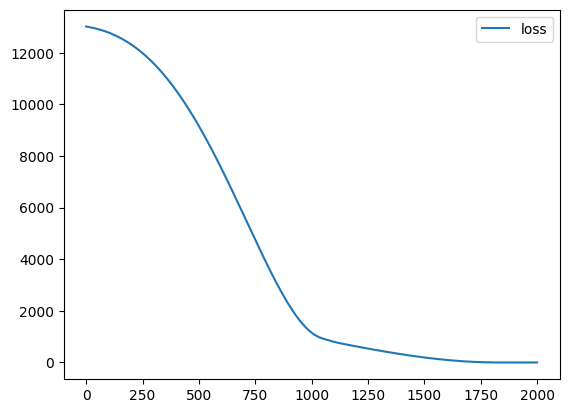

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(x_test)
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 0.0272


0.027206754311919212

In [ ]:
x_n1=[[4]]
x_n1_1= Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[40.92284]], dtype=float32)